# Tutorial 2 (Introduction to AI), Part 2

# Exploring classification with Decision Trees

In the second part of tutorial 2 we again study classification.  **Classification** - between more than two classes, for instance the iris dataset (3-way classification).  

##  1. Decision Trees

In this part of tutorial 2 we will look at decision trees: trees that can be used as algorithma to automate decision making.  Decision trees are considered human-readable.  As such, they are compatible with human driven processes such as governance, ethics, law, and audits.  Many AI models are based on statistical models that aren't easily human-readable, hence are difficult to interpret.

Decision trees are one of the simplest methods for supervised learning. They can be applied for both regression and classification.

At each node of a tree, a test is applied which sends the query sample down one of the branches of the node. This continues until the query sample arrives at a terminal or leaf node. Each leaf node is associated with a value: a class label in classification, or a numeric value in regression. The value of the leaf node reached by the query sample is returned as the output of the tree.

### Decision Trees using sklearn

There is a very powerful decision tree classification model implemented in sklearn sklearn.tree.DecisionTreeClassifier. With this we can cleany implement decision trees in just a few lines of code. The steps to use the sklearn classification decision tree follow the principal sklearn API which are:

- Choose the model you want to use --> the DecisionTreeClassifier
- Set the model hyperparameters --> E.g. number of minimum samples per leaf
- Create a feature data set as well as a target array containing the labels for the instances
- Fit the model to the training data
- Use the fitted model on unseen data.

### Iris Dataset

Here we will work with the iris dataset.  The dataset contains 150 samples, with features being measurements of various aspects of the flowers.  There are three types of iris, so the problem of assigning a type of iris is a 3-way classification problem.

In [ ]:
import os
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#load iris dataset from sklearn
iris = datasets.load_iris()

#print(iris.target[:5])
#print(iris.data[:5])

#print(iris.feature_names)

#load iris dataset from sklearn
iris = datasets.load_iris()

#print(iris.target[:5])
#print(iris.data[:5])

#print(iris.feature_names)

X = iris.data
y = iris.target
variety = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

decision_tree = DecisionTreeClassifier(criterion = 'entropy')

decision_tree.fit(X_train,y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.05)
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test, y_pred)

print('Accuracy: %.2f' % accuracy)

print(cm)

plt.figure()
plot_confusion_matrix(cm, variety, title='')

Accuracy: 0.97
[[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


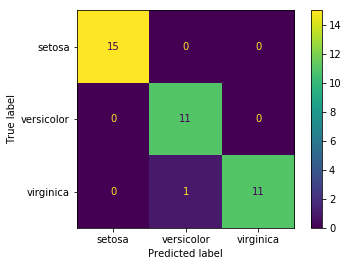

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=variety)
disp.plot()
plt.show()


## 2. K-Fold Cross Validation

There are several types of cross validation; however, K-fold is the most common.  The value K specifies the number of folds.  The two most common values for K are either 5 or 10.  For this session we will use a K value of 5, or a 5-fold cross validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

First, the data are split into 5 equal (or close to, due to rounding) folds.  These folds are used to generate 5 training/validation set combinations.  Each of the folds becomes the validation set once, and the remaining folds become the training sets.  This allows the validated results to be appended together to produce a final out-of-sample prediction for the entire dataset.  

The following code demonstrates a 5-fold cross validation, using the decision tree model above:

In [ ]:
# Use 5-fold split
kf = KFold(5,shuffle=True)

fold = 1
# The data is split five ways, for each fold, the
# Perceptron is trained, tested and evaluated for accuracy
for train_index, validate_index in kf.split(X,y):
    decision_tree.fit(X[train_index],y[train_index])
    y_test = y[validate_index]
    y_pred = decision_tree.predict(X[validate_index])
    #print(y_test)
    #print(y_pred)
    #print(f"Fold #{fold}, Training Size: {len(trainDF)}, Validation Size: {len(validateDF)}")
    print(f"Fold #{fold}, Training Size: {len(X[train_index])}, Validation Size: {len(X[validate_index])}")
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    fold += 1

Fold #1, Training Size: 120, Validation Size: 30
Accuracy: 0.97
Fold #2, Training Size: 120, Validation Size: 30
Accuracy: 0.97
Fold #3, Training Size: 120, Validation Size: 30
Accuracy: 0.90
Fold #4, Training Size: 120, Validation Size: 30
Accuracy: 0.93
Fold #5, Training Size: 120, Validation Size: 30
Accuracy: 0.93


You might then present each of these results as a confusion matrix.

Note that different fold might give different results, and that in the code above, as no fixed random state is given, different runs might also give different results.

## Exercise

1. Another classic classification dataset that comes with Scikit-Learn is the wine dataset.  You can read a summary of it here https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html.  The dataset can be accessed with datasets.load_wine().

Use Spyder to write code that will:
- load this dataset
- build decision tree classifier(s) for it
- you will need to split the data (try out both train_test_split and kFold cross validation)
- you should assess how well the classifier(s) perform
- you should produce a confusion matrix illustrating this performance


2. Apply the perceptron model to the iris dataset, both with and without a Standard scaler.